# **Final Project DQLab Bootcamp Data Analyst SQL & Python using Google Platform - Batch 15**

Made by: Dewi Fitradano Adam

**Information About HR Analytics Dataset**

This dataset provides various attributes such as employee data, performance and survey metrics, training information, and diversity details to predict key factor influencing training outcome.

# **Import Module & Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/HR_Data_Analysis.xlsx')
data = pd.DataFrame(data)
data.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,2019-09-20,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,2023-07-15,Leadership Development,Internal,Failed,2,606.11,50
1,3428,2023-02-11,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,2022-09-12,Customer Service,External,Incomplete,4,673.02,58
2,3429,2018-12-10,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,2022-08-13,Leadership Development,External,Failed,2,413.28,27
3,3430,2021-06-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,2022-12-15,Project Management,External,Completed,3,663.78,23
4,3431,2019-06-29,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,2023-07-13,Technical Skills,External,Failed,5,399.03,50


# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee ID                 2845 non-null   int64         
 1   StartDate                   2845 non-null   datetime64[ns]
 2   Title                       2845 non-null   object        
 3   BusinessUnit                2845 non-null   object        
 4   EmployeeStatus              2845 non-null   object        
 5   EmployeeType                2845 non-null   object        
 6   PayZone                     2845 non-null   object        
 7   EmployeeClassificationType  2845 non-null   object        
 8   DepartmentType              2845 non-null   object        
 9   Division                    2845 non-null   object        
 10  DOB                         2845 non-null   datetime64[ns]
 11  State                       2845 non-null   object      

In [ ]:
#Check if the column name is correct
print('Before Fixed')
data.columns.tolist()

Before Fixed


['Employee ID',
 'StartDate',
 'Title',
 'BusinessUnit',
 'EmployeeStatus',
 'EmployeeType',
 'PayZone',
 'EmployeeClassificationType',
 'DepartmentType',
 'Division',
 'DOB',
 'State',
 'GenderCode',
 'RaceDesc',
 'MaritalDesc',
 'Performance Score',
 'Current Employee Rating',
 'Survey Date',
 'Engagement Score',
 'Satisfaction Score',
 'Work-Life Balance Score',
 'Training Date',
 'Training Program Name',
 'Training Type',
 'Training Outcome',
 'Training Duration(Days)',
 'Training Cost',
 'Age']

In [ ]:
#If column name is not consistent means needs to be fixed
print('After Fixed')
data.columns.str.strip().tolist()

After Fixed


['Employee ID',
 'StartDate',
 'Title',
 'BusinessUnit',
 'EmployeeStatus',
 'EmployeeType',
 'PayZone',
 'EmployeeClassificationType',
 'DepartmentType',
 'Division',
 'DOB',
 'State',
 'GenderCode',
 'RaceDesc',
 'MaritalDesc',
 'Performance Score',
 'Current Employee Rating',
 'Survey Date',
 'Engagement Score',
 'Satisfaction Score',
 'Work-Life Balance Score',
 'Training Date',
 'Training Program Name',
 'Training Type',
 'Training Outcome',
 'Training Duration(Days)',
 'Training Cost',
 'Age']

In [ ]:
data.isnull().sum()

,0
Employee ID,0
StartDate,0
Title,0
BusinessUnit,0
EmployeeStatus,0
EmployeeType,0
PayZone,0
EmployeeClassificationType,0
DepartmentType,0
Division,0


In [ ]:
# Check duplicate entries based on Employee ID
duplicate_id = data[data.duplicated(subset=["Employee ID"], keep=False)]

# Show total of duplicate ID
print(f"Total duplicate Employee ID: {duplicate_id.shape[0]}")
print(duplicate_id)

Total duplicate Employee ID: 0
Empty DataFrame
Columns: [Employee ID, StartDate, Title, BusinessUnit, EmployeeStatus, EmployeeType, PayZone, EmployeeClassificationType, DepartmentType, Division, DOB, State, GenderCode, RaceDesc, MaritalDesc, Performance Score, Current Employee Rating, Survey Date, Engagement Score, Satisfaction Score, Work-Life Balance Score, Training Date, Training Program Name, Training Type, Training Outcome, Training Duration(Days), Training Cost, Age]
Index: []

[0 rows x 28 columns]


In [ ]:
data.shape

(2845, 28)

# **Analyzing Data**

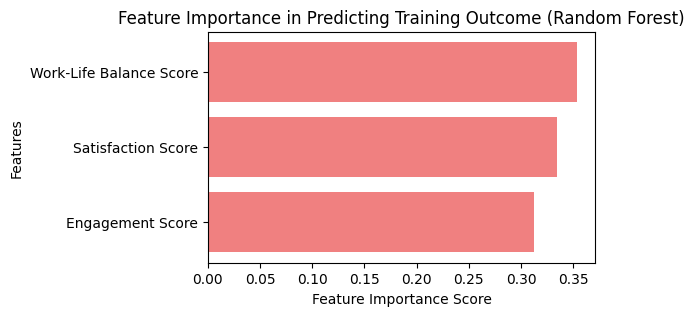

Feature Importance: {'Engagement Score': 0.31230906938681136, 'Satisfaction Score': 0.3341481118837478, 'Work-Life Balance Score': 0.3535428187294409}


In [ ]:
#To identify importance feature in predicting training outcomes using Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Select relevant features and target
data_selected = data[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score', 'Training Outcome']].dropna()

# Encode target variable
label_encoder = LabelEncoder()
data_selected['Training Outcome'] = label_encoder.fit_transform(data_selected['Training Outcome'])

# Define features (X) and target (y)
X = data_selected[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']]
y = data_selected['Training Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
rf_feature_importance = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.barh(X.columns, rf_feature_importance, color='lightcoral')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Training Outcome (Random Forest)")
plt.show()

# Display feature importance as a dictionary
rf_feature_importance_dict = dict(zip(X.columns, rf_feature_importance))
print("Feature Importance:", rf_feature_importance_dict)


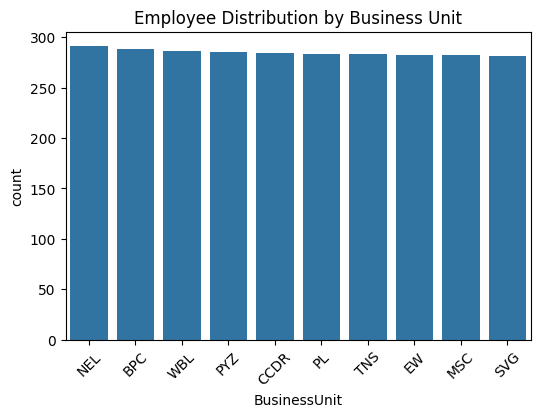

In [ ]:
#Total of employee by business unit
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='BusinessUnit', order=data['BusinessUnit'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Employee Distribution by Business Unit")
plt.show()

Text(0.5, 1.0, 'Employee Distribution by Job Status')

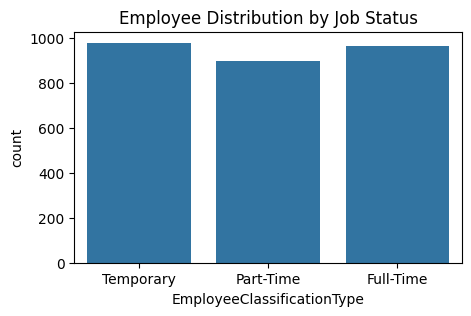

In [ ]:
#Total of employee by employee classification (full-time, part-time, etc)
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='EmployeeClassificationType')
plt.title("Employee Distribution by Job Status")

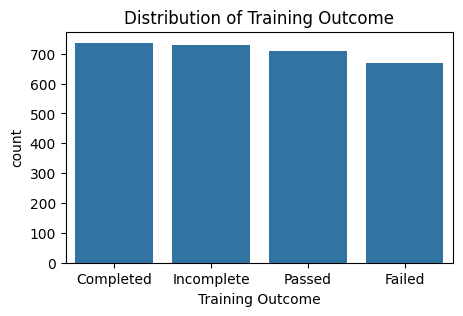

In [ ]:
#Distribution of training outcome
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Training Outcome', order=data['Training Outcome'].value_counts().index)
plt.title("Distribution of Training Outcome")
plt.show()

In [ ]:
# Calculate total of category in Training Outcome column
print("Training Outcome:")
print(data["Training Outcome"].value_counts())

Training Outcome:
Training Outcome
Completed     737
Incomplete    731
Passed        709
Failed        668
Name: count, dtype: int64


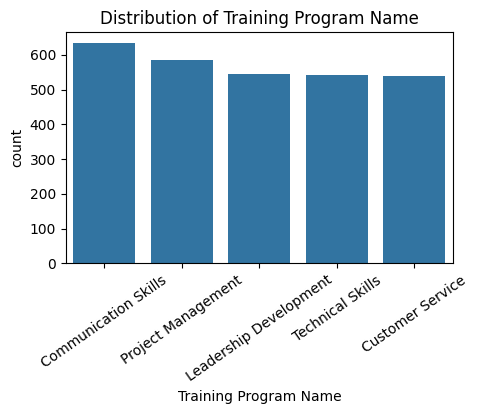

In [ ]:
#Distribution of training program name
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Training Program Name', order=data['Training Program Name'].value_counts().index)
plt.title("Distribution of Training Program Name")
plt.xticks(rotation=35)
plt.show()

In [ ]:
# Calculate total of category in Training Program Name column
print("Training Program Name:")
print(data["Training Program Name"].value_counts())

Training Program Name:
Training Program Name
Communication Skills      633
Project Management        585
Leadership Development    544
Technical Skills          543
Customer Service          540
Name: count, dtype: int64


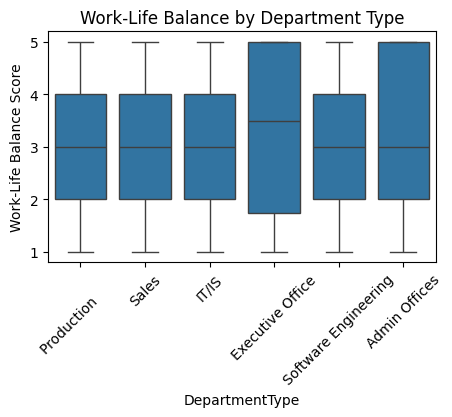

In [ ]:
#Work-life balance based on business unit
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x="DepartmentType", y="Work-Life Balance Score")
plt.xticks(rotation=45)
plt.title("Work-Life Balance by Department Type")
plt.show()

In [ ]:
if "Training Duration(Days)" in data.columns and "Training Outcome" in data.columns:
  #statistic descriptive based on category of training outcome
  stats = data.groupby("Training Outcome")["Training Duration(Days)"].describe()
  print(stats)
else:
  print("Column 'Training Duration(Days)' or 'Training Outcome' is not found in the data.")

                  count      mean       std  min  25%  50%  75%  max
Training Outcome                                                    
Completed         737.0  2.960651  1.405472  1.0  2.0  3.0  4.0  5.0
Failed            668.0  3.000000  1.427929  1.0  2.0  3.0  4.0  5.0
Incomplete        731.0  2.923393  1.416009  1.0  2.0  3.0  4.0  5.0
Passed            709.0  3.015515  1.431501  1.0  2.0  3.0  4.0  5.0


    Training Program Name  Training Cost
0    Communication Skills     544.303318
1        Customer Service     569.882463
2  Leadership Development     561.423658
3      Project Management     562.922735
4        Technical Skills     560.117551


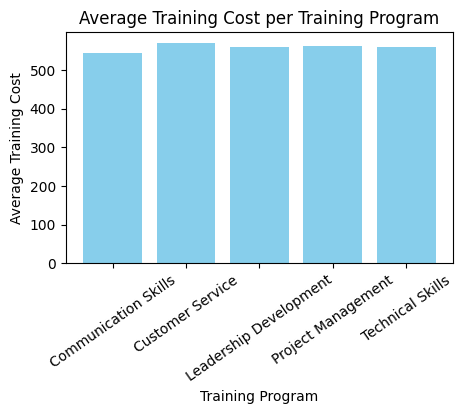

In [ ]:
# Make sure columns are available
if "Training Program Name" in data.columns and "Training Cost" in data.columns:
    # Calculate average of training cost for each training program
    avg_cost = data.groupby("Training Program Name")["Training Cost"].mean().reset_index()

    # Show result
    print(avg_cost)
else:
    print("The 'Training Program Name' or 'Training Cost' column is not found in the data.")

# Visualize average of training cost
plt.figure(figsize=(5, 3))
plt.bar(avg_cost["Training Program Name"], avg_cost["Training Cost"], color="skyblue")
plt.xlabel("Training Program")
plt.ylabel("Average Training Cost")
plt.title("Average Training Cost per Training Program")
plt.xticks(rotation=35)  # Rotate labels for easier reading
plt.show()

In [ ]:
#average daily training cost for each program
data["Cost Per Day"] = data["Training Cost"] / data["Training Duration(Days)"]
avg_cost_per_day = data.groupby("Training Program Name")["Cost Per Day"].mean().sort_values()

print(avg_cost_per_day)

Training Program Name
Communication Skills      250.196554
Leadership Development    259.949839
Project Management        262.460960
Customer Service          265.523125
Technical Skills          266.485986
Name: Cost Per Day, dtype: float64


In [ ]:
# Statistic descriptive based on Training Program
stats = data.groupby("Training Program Name")[["Training Duration(Days)", "Training Cost"]].describe()
print(stats)

                       Training Duration(Days)                                \
                                         count      mean       std  min  25%   
Training Program Name                                                          
Communication Skills                     633.0  2.963665  1.427668  1.0  2.0   
Customer Service                         540.0  2.970370  1.412590  1.0  2.0   
Leadership Development                   544.0  3.022059  1.423129  1.0  2.0   
Project Management                       585.0  3.003419  1.425065  1.0  2.0   
Technical Skills                         543.0  2.909761  1.410672  1.0  2.0   

                                      Training Cost                          \
                        50%  75%  max         count        mean         std   
Training Program Name                                                         
Communication Skills    3.0  4.0  5.0         633.0  544.303318  263.810900   
Customer Service        3.0  4.0  5.0      

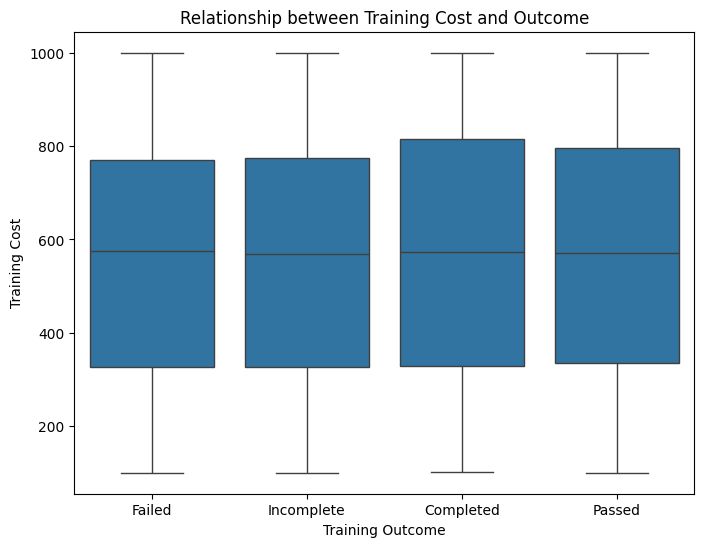

In [ ]:
#does expensive program mean more successful?
plt.figure(figsize=(8, 6))
sns.boxplot(x="Training Outcome", y="Training Cost", data=data)
plt.title("Relationship between Training Cost and Outcome")
plt.xlabel("Training Outcome")
plt.ylabel("Training Cost")
plt.show()

In [ ]:
# Calculate total of category in EmployeeStatus column
print("EmployeeStatus Distribution:")
print(data["EmployeeStatus"].value_counts())

EmployeeStatus Distribution:
EmployeeStatus
Active        2458
Terminated     387
Name: count, dtype: int64
